In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline

In [3]:
df_users = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Take_Home_Challenge/relax_challenge/takehome_users.csv',encoding = "latin-1")




In [4]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df_users['time_stamp_dt'] = pd.to_datetime(df_users['creation_time'])

In [6]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp_dt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-21 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-17 10:14:20


In [7]:
from datetime import datetime

#df_users['time_stamp_dt'] = datetime.strptime(df_users['time_stamp_dt'],'%m/%d/%y')

df_users['time_stamp_fmt_dt'] = df_users['time_stamp_dt'].dt.strftime('%m/%d/%Y')
df_users['time_stamp_fmt_dt'] = pd.to_datetime(df_users['time_stamp_fmt_dt'])


In [8]:
df_users['time_stamp_monthyr_dt'] = df_users['time_stamp_dt'].dt.strftime('%m/%Y')
df_users['time_stamp_monthyr_dt'] = pd.to_datetime(df_users['time_stamp_monthyr_dt'])

In [9]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp_dt,time_stamp_fmt_dt,time_stamp_monthyr_dt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,2014-04-22,2014-04-01
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2013-11-15,2013-11-01
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52,2013-03-19,2013-03-01
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-21 08:09:28,2013-05-21,2013-05-01
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-17 10:14:20,2013-01-17,2013-01-01


In [95]:
df_users['time_stamp_monthyr_dt'].unique()

array(['2014-04-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2013-02-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2013-10-01T00:00:00.000000000', '2012-07-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
df_user_engagement = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Take_Home_Challenge/relax_challenge/takehome_user_engagement.csv',encoding = "latin-1")




In [11]:
df_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
df_user_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [12]:
df_user_engagement['time_stamp_dt'] = pd.to_datetime(df_user_engagement['time_stamp'])

In [13]:
df_user_engagement.head()

,time_stamp,user_id,visited,time_stamp_dt
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04


In [14]:
df_user_engagement.index = df_user_engagement['time_stamp_dt']

In [15]:
df_user_engagement['time_stamp_dt'] = df_user_engagement.index.to_period('W-MON').end_time

In [24]:
df_user_engagement['visited'].unique()

array([1])

In [16]:
df_user_engagement.head()

,time_stamp,user_id,visited,time_stamp_dt
time_stamp_dt,,,,
2014-04-28,2014-04-22 03:53:30,1,1,2014-04-28
2013-11-18,2013-11-15 03:45:04,2,1,2013-11-18
2013-12-02,2013-11-29 03:45:04,2,1,2013-12-02
2013-12-09,2013-12-09 03:45:04,2,1,2013-12-09
2013-12-30,2013-12-25 03:45:04,2,1,2013-12-30


#### Now We have for each user the time they logged in,their user id and the index contains the Week in which they had logged in with the end-date of the week marked as an index date 

#### Next we will aggregate weekly count by user 

In [17]:
weekly_f_summary = pd.DataFrame()
weekly_f_summary['countlogin'] = df_user_engagement['visited'].resample('W-MON').count()

In [18]:
weekly_f_summary.head()

,countlogin
time_stamp_dt,
2012-06-04,41
2012-06-11,66
2012-06-18,106
2012-06-25,105
2012-07-02,127


#### As we can see above this approach of resampling is not going to work since we have to group by user and by date so as shown below we are going to use Grouper function

In [20]:
df_user_eng_weekly_new = pd.DataFrame()
df_user_eng_weekly_new['weekly_count'] = df_user_engagement.groupby(['user_id', pd.Grouper(key='time_stamp_dt', freq='W-MON')])['visited'].sum()

In [21]:
df_user_eng_weekly_new.head(40)

weekly_count
user_id time_stamp_dt              
1       2014-04-28                1
2       2013-11-18                1
        2013-12-02                1
        2013-12-09                1
        2013-12-30                1
        2014-01-06                1
        2014-01-13                1
        2014-02-03                1
        2014-02-10                2
        2014-02-17                2
        2014-03-10                1
        2014-03-17                1
        2014-03-31                1
3       2013-03-25                1
4       2013-05-27                1
5       2013-01-28                1
6       2013-12-23                1
7       2012-12-24                1
10      2013-01-21                1
        2013-01-28                1
        2013-02-04                2
        2013-02-11                1
        2013-02-18                2
        2013-02-25                1
        2013-03-04                3
        2013-03-11                2
        2013-03-18                2
        2013-03-25                2
        2013-04-01                1
        2013-04-08                1
        2013-04-15                3
        2013-04-22                2
        2013-04-29                3
        2013-05-06                5
        2013-05-13                4
        2013-05-20                3
        2013-05-27                3
        2013-06-03                2
        2013-06-10                4
        2013-06-17                5

In [22]:
df_user_eng_weekly_new.columns

Index(['weekly_count'], dtype='object')

In [23]:
active_weekly_users = df_user_eng_weekly_new.loc[df_user_eng_weekly_new['weekly_count'] >= 3]

In [24]:
not_that_active_users = df_user_eng_weekly_new.loc[df_user_eng_weekly_new['weekly_count'] < 3]

In [25]:
not_that_active_users.head()

weekly_count
user_id time_stamp_dt              
1       2014-04-28                1
2       2013-11-18                1
        2013-12-02                1
        2013-12-09                1
        2013-12-30                1

### Analysing 'Actively Engaged' users

In [26]:
active_users=set()

for user_id,timestamp in active_weekly_users.index.values:
    active_users.add(user_id)

In [27]:
df_active_users_data = df_users[df_users['object_id'].isin(active_users)]

In [28]:
df_active_users_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp_dt,time_stamp_fmt_dt,time_stamp_monthyr_dt
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-01-16 22:08:03,2013-01-16,2013-01-01
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,2014-03-06 11:46:38,2014-03-06,2014-03-01
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,2012-11-11 19:05:07,2012-11-11,2012-11-01
42,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0,2012-12-31 07:13:17,2012-12-31,2012-12-01
52,53,2013-02-09 23:47:15,Ribeiro Camila,CamilaGomesRibeiro@gmail.com,GUEST_INVITE,1.367798e+09,0,0,37,3641.0,2013-02-09 23:47:15,2013-02-09,2013-02-01


In [29]:
df_active_users_data.loc[df_active_users_data['object_id']==2,:]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp_dt,time_stamp_fmt_dt,time_stamp_monthyr_dt


In [30]:
df_active_users_data.shape

(1444, 13)

In [31]:
df_active_users_data['creation_source'].unique()

array(['ORG_INVITE', 'SIGNUP', 'GUEST_INVITE', 'SIGNUP_GOOGLE_AUTH',
       'PERSONAL_PROJECTS'], dtype=object)

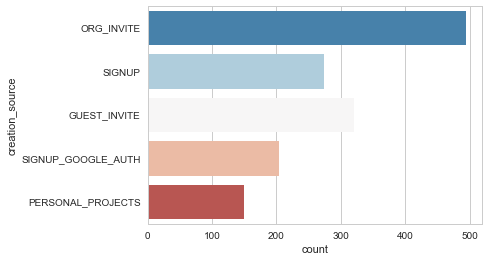

In [32]:
sns.set_style('whitegrid')
sns.countplot(y=df_active_users_data['creation_source'],data=df_active_users_data,palette='RdBu_r')

In [33]:
df_active_users_data['opted_in_to_mailing_list'].unique()

array([1, 0])

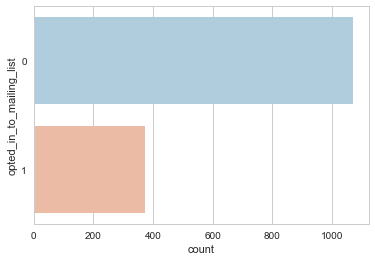

In [34]:
sns.set_style('whitegrid')
sns.countplot(y=df_active_users_data['opted_in_to_mailing_list'],data=df_active_users_data,palette='RdBu_r')

In [35]:

null_invited_by =df_active_users_data.loc[df_active_users_data['invited_by_user_id'].isnull(),:]['invited_by_user_id']
null_invited_by.size

628

In [36]:
ratio = null_invited_by.size/1444
ratio

0.43490304709141275

In [37]:
df_active_users_data['enabled_for_marketing_drip'].unique()

array([1, 0])

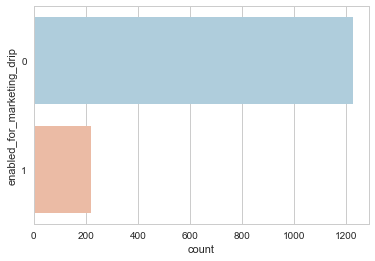

In [38]:
sns.set_style('whitegrid')
sns.countplot(y=df_active_users_data['enabled_for_marketing_drip'],data=df_active_users_data,palette='RdBu_r')

In [39]:
mkt_drip_zero_act = df_active_users_data[df_active_users_data['enabled_for_marketing_drip']==0]['enabled_for_marketing_drip']

In [40]:
mkt_drip_zero_act_cnt =mkt_drip_zero_act.count()

In [41]:
mkt_drip_one_act = df_active_users_data[df_active_users_data['enabled_for_marketing_drip']==1]['enabled_for_marketing_drip']

In [42]:
mkt_drip_one_act_cnt =mkt_drip_one_act.count()

In [43]:
act_zero_ratio = mkt_drip_zero_act_cnt/(mkt_drip_zero_act_cnt+mkt_drip_one_act_cnt)
act_zero_ratio

0.8483379501385041

In [44]:
act_one_ratio = mkt_drip_one_act_cnt/(mkt_drip_zero_act_cnt+mkt_drip_one_act_cnt)
act_one_ratio

0.15166204986149584

### Removing users who became 'Actively Engaged' from users who are 'Not Actively Engaged'

#### There are some users who are in 'not active' list and are also part of 'active' list , this happens when for some time perios the user is not that active but later on their activity picks up

#### so we will drop those users who became active later from 'inactive user' list

In [47]:
mixed_users=set()

for user_id,timestamp in not_that_active_users.index.values:
    mixed_users.add(user_id)

In [48]:
active_users_from_inact = mixed_users.intersection(active_users)

#### lets remove these users from the 'inactive_users' data set

In [49]:
 not_that_active_users = not_that_active_users.drop(active_users_from_inact)

In [167]:

for user_id in active_users_from_inact:
    not_that_active_users.drop(not_that_active_users.index[user_id])

In [50]:
not_that_active_users.loc[2,:]

,weekly_count
time_stamp_dt,
2013-11-18,1
2013-12-02,1
2013-12-09,1
2013-12-30,1
2014-01-06,1
2014-01-13,1
2014-02-03,1
2014-02-10,2
2014-02-17,2


### Analysing 'Not Actively Engaged' users

#### Now we have 'not_that_active_users' dataframe that contains the 'not actively engaged' users only so Lets Analyze the users who were not actively engaged

In [190]:
inactive_users=set()

for user_id,timestamp in not_that_active_users.index.values:
    inactive_users.add(user_id)

In [191]:
df_inactive_users_data = df_users[df_users['object_id'].isin(inactive_users)]

In [192]:
df_inactive_users_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp_dt,time_stamp_fmt_dt,time_stamp_monthyr_dt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,2014-04-22,2014-04-01
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2013-11-15,2013-11-01
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52,2013-03-19,2013-03-01
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-21 08:09:28,2013-05-21,2013-05-01
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-17 10:14:20,2013-01-17,2013-01-01


In [193]:
df_inactive_users_data.shape

(7379, 13)

In [195]:
df_inactive_users_data['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

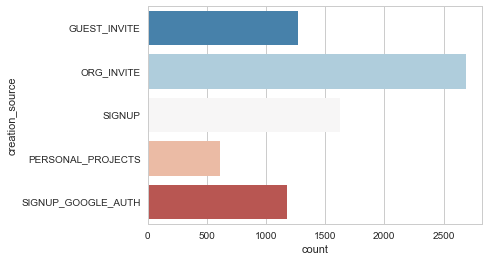

In [196]:
sns.set_style('whitegrid')
sns.countplot(y=df_inactive_users_data['creation_source'],data=df_inactive_users_data,palette='RdBu_r')

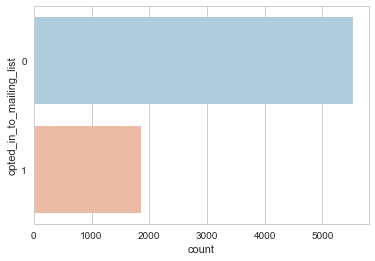

In [197]:
sns.set_style('whitegrid')
sns.countplot(y=df_inactive_users_data['opted_in_to_mailing_list'],data=df_inactive_users_data,palette='RdBu_r')

In [198]:
null_invited_by_inact =df_inactive_users_data.loc[df_inactive_users_data['invited_by_user_id'].isnull(),:]['invited_by_user_id']
null_invited_by_inact.size

3419

In [200]:
ratioin = 3419/7379
ratioin

0.4633419162488142

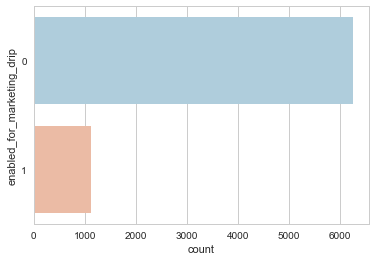

In [199]:
sns.set_style('whitegrid')
sns.countplot(y=df_inactive_users_data['enabled_for_marketing_drip'],data=df_inactive_users_data,palette='RdBu_r')

In [201]:
mkt_drip_zero = df_inactive_users_data[df_inactive_users_data['enabled_for_marketing_drip']==0]['enabled_for_marketing_drip']

In [202]:
cnt_drip_zero = mkt_drip_zero.count()

In [203]:
mkt_drip_one = df_inactive_users_data[df_inactive_users_data['enabled_for_marketing_drip']==1]['enabled_for_marketing_drip']

In [204]:
cnt_drip_one = mkt_drip_one.count()

In [206]:
ration_mktdrip_zero = cnt_drip_zero/(cnt_drip_zero+cnt_drip_one)
ration_mktdrip_one = cnt_drip_one/(cnt_drip_zero+cnt_drip_one)
ration_mktdrip_zero


0.84794687627049736

In [207]:
ration_mktdrip_one

0.15205312372950264

### Conclusion and Recommendation

#### For Users that are 'Inactive',  we see that for 46% are not Invited by existing user User where as for users that are 'Active' , we see that 43% are not Invited by existing user , thus the higher the ratio of 'Invited by user' the better is the quality of the User engagement thus Relax should incentivise their existing user to Invite more users and make sure inviting the other user is as simple as single click to help exisitng user invite more new users 

#### As far as creation source we definately see the difference between 'Active' and 'Inactive' users , we can see that 'Guest Invite' is a bigger factor for 'Active' users where as 'SIgn_up' is the biggest factor for 'Inactive' users, so more the 'Guest Invite' the better is the 'Adoption' rate, another factor that we obeserve is the 'Personal Project' as we can see that the proportion of 'Personal Project' is higher among the 'Active' users.

#### Based on these observations we can see that 'Personal Project' and 'Guest Invite' are playing a bigger role in making sure the user is 'actively engaged' on the platform

#### It would be also interesting to capture Campaign Attribution with the Campaign stages so that we can check what Stage of the Campaign the given user is in and how 'Actively engaged' the user is therby checking the Return on Investement on Campaign and may be designing new Campaigns to make sure more users are actively angaged